#Project1

#Pima Indian diabetes



**Who is Pima Indians:**
The Pima (or Akimel O'odham, also spelled Akimel Oʼotham, "River People," formerly known as Pima) are a group of Native Americans living in an area consisting of what is now central and southern Arizona, as well as northwestern Mexico in the states of Sonora and Chihuahua. The majority population of the two current bands of the Akimel O'odham in the United States are based in two reservations: the Keli Akimel Oʼodham on the Gila River Indian Community (GRIC) and the On'k Akimel O'odham on the Salt River Pima-Maricopa Indian Community (SRPMIC). [From Wikipedia](https://en.wikipedia.org/wiki/Pima_people)


**Variables**: The data set has 768 records, 8 attributes, 2 classes, 268(34.9%) positive results for a diabetes test, and 500(65.1%) negative results.
All patients were females at least 21 years old of Pima Indian Heritage.

**Variable Descriptions:**

1. Pregnancies: Number of times pregnant.

2. Glucose: Plasma glucose concentration at 2 hours in an oral glucose tolerance test. 
[Check this link.](https://medlineplus.gov/ency/article/003466.htm#:~:text=Normal%20Results&text=2%20hours%20%2D%2D%20This%20value,L%20is%20diagnostic%20of%20diabetes.)
Normal blood values for a 75 gram OGTT used to check for type 2 diabetes in those who are not pregnant:
* Fasting -- 60 to 100 mg/dL (3.3 to 5.5 mmol/L)
* 1 hour -- Less than 200 mg/dL (11.1 mmol/L)

  2 hours -- This value is used to make the diagnosis of diabetes.
* Less than 140 mg/dL (7.8 mmol/L). 
* Between 141mg/dL and 200 mg/dL (7.8 to 11.1 mmol/L) is considered impaired glucose tolerance. 
* Above 200 mg/dl (11.1mmol/L) is diagnostic of diabetes.)

3. Blood Pressure:  Diastolic Blood Pressure in mmHg,[This link](https://www.medicinenet.com/blood_pressure_chart_reading_by_age/article.htm), normal systolic is 120 or less, and normal diastolic is 80 or less.

4. Skin Thickness: Triceps skin fold thickness in mm. 

[This link ](http://www.brooklyn.cuny.edu/bc/ahp/LAD/C4d/C4d_skin.html#:~:text=Although%20it%20is%20only%20about,human%20skin%20has%20three%20layers.) explain about skin. This highly specialized organ serves many functions that range from protection (against attacks of all kinds), a sensitive interface between the outside world and the world inside the body (there a LOT of sensory nerves and organs located in the skin layer), temperature regulation (sweating), location of hair, storage of lipids and insulation (loss of heat from a body that is often well above the outside temperature).

* from 3.40 mm to 25.20 mm in females [link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3784870/#:~:text=The%20subcutaneous%20tissue%20thickness%20range,BMI%20increases%20%5BTable%207%5D.). 

5. Insulin: 2-hour serum insulin in (mu U/ml),
This 2 hour Glucose Tolerance Test with Insulin levels is used to assess how an individual processes glucose and how the insulin in the body responds to those glucose levels [link.](https://www.healthtestingcenters.com/test/glucose-tolerance-test-insulin-2-hour/). 

* normal insuline level 16-166 ml U/L. [link.](https://emedicine.medscape.com/article/2089224-overview).

6. BMI: Body Mass Index (weight in kg/(height in m)^2). [According to link:](https://www.who.int/europe/news-room/fact-sheets/item/a-healthy-lifestyle---who-recommendations)
* Below 18.5 : Underweight
* 18.5-25.9: Normal weight
* 25.0 -29.9: Pre-obesity
* 30.0-34.9 : Obesity classI
* 35.0-39.9 : Obesity classII
* above 40: Obesity class III


7. DiabetesPedigreeFunction : Diabetes pedigree function.
A function which scores likelihood of diabetes based on family history.

8. Age: Age(years)

9. Outcome: class variable (0 if non-diabetic, 1 if dabetic)

##Initial Exploratory Data Analysis
First, read the data into python using pandas, read csv file.

In [13]:
# load pandas and numpy libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import (model_selection,preprocessing)
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [14]:
#loading the data from my own github repo
df = pd.read_csv('https://raw.githubusercontent.com/JoannePyo/Data_Analysis_381/main/Project1/diabetes.csv')

#create a second stored value of original data as a safety
df_orignal =df

#check the dataset 
print("Observations: {}".format(df.shape[0]))
df

Observations: 768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
# rename the columns
df.columns = ["Num_Pregnancies", "twohr_glucose", "BP", "SkinThick", "twohr_Insulin", "BMI","DB_pedigree_function", "Age", "Diabetic"]
df

,Num_Pregnancies,twohr_glucose,BP,SkinThick,twohr_Insulin,BMI,DB_pedigree_function,Age,Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
#Inspect the Dataset
#check the shape for the dataframe
df.shape

(768, 9)

Finding:
> there has 768 rows and 9 columns.

In [17]:
#statistical summary of numeric variables:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Num_Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
twohr_glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BP,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThick,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
twohr_Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DB_pedigree_function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Diabetic,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Finding:
> There has high number of insuline. It is over 800. if blood suar is above 800, it is a diabetic coma. A diabetic coma could happen when your blood sugar gets too high -- 600 milligrams per deciliter (mg/dL) or more -- causing you to become very dehydrated. It usually affects people with type 2 diabetes that isn't well-controlled. It's common among those who are elderly, chronically ill, and disabled form [link](https://www.webmd.com/diabetes/hyperglycemic-hyperosmolar-nonketonic-syndrome).




In [18]:
#Identify the Data Types
df_info = pd.DataFrame(df.dtypes,columns=['Dtype'])

#Identify the unique values
df_info['Nunique'] = df.nunique()

#check missing values for each column
df_info['MissingValues']=df.isnull().sum()

# Identify the count for each variable
df_info['Count']=df.count()

# Identify the zero values for each variable
df_info['ZeroValues']=(df==0).sum()

# how many '?' values
df_info['?Values']=(df=='?').sum()

df_info

,Dtype,Nunique,MissingValues,Count,ZeroValues,?Values
Num_Pregnancies,int64,17,0,768,111,0
twohr_glucose,int64,136,0,768,5,0
BP,int64,47,0,768,35,0
SkinThick,int64,51,0,768,227,0
twohr_Insulin,int64,186,0,768,374,0
BMI,float64,248,0,768,11,0
DB_pedigree_function,float64,517,0,768,0,0
Age,int64,52,0,768,0,0
Diabetic,int64,2,0,768,500,0


findings:
> 1. There has no missing values and ? values.
2. There has zero values in Num_Pregnancies, twohr_glucose, BP, SkinThick, twohr_Insulin, BMI, and Outcome. But it is not make sence to get 0 values in twohr_glucose, BP, SkinThick, twohr_Insulin, and BMI.


##Data correlation matrix

The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the bettere correlation there is between two characteristics

In [19]:
# view correlation matrix for the variables in the dataset
corrMatrix = df.corr()
corrMatrix

,Num_Pregnancies,twohr_glucose,BP,SkinThick,twohr_Insulin,BMI,DB_pedigree_function,Age,Diabetic
Num_Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
twohr_glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
twohr_Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DB_pedigree_function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Diabetic,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


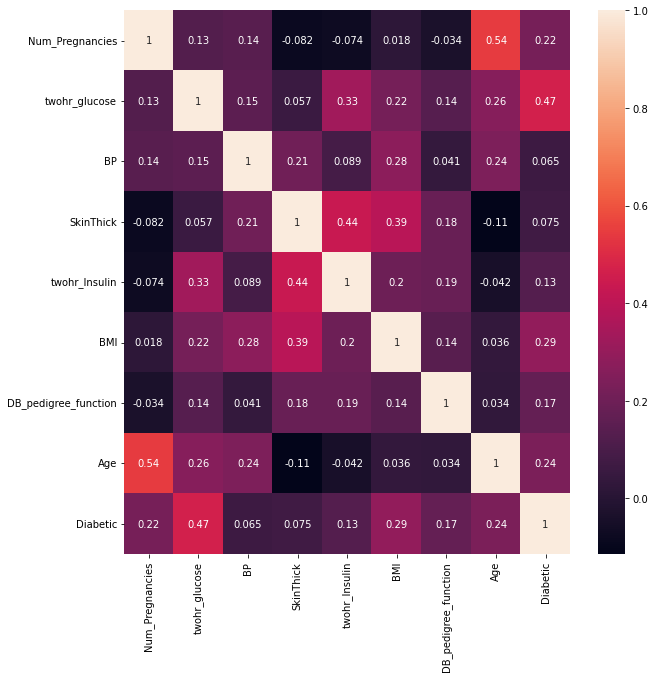

In [20]:
# show visual representation of the correlation matrix
plt.rcParams.update({'font.size': 10,'figure.figsize':(10,10)})
f3 = sns.heatmap(corrMatrix, annot=True)
plt.show()  # show plot

Findings:
> 1. There are no strong correlation between the features.
* Num_Pregnancies x Age (0.54)
* twohr_glucose x Diabetic (0.47)
* twohr_Insulin x SkinThick (0.44) 
2. Negative correlation:
* Num_Pregnancies x DB_pedigree_function(-0.033)

Finding with Diabetic:
> 1. Diabetic x twohr_glucose (0.47)
2. Diabetic x BMI (0.29)
3. Diabetic x Age (0.24)
4. Diabetic x Num_Pregnancies (0.22)

<Figure size 720x720 with 0 Axes>

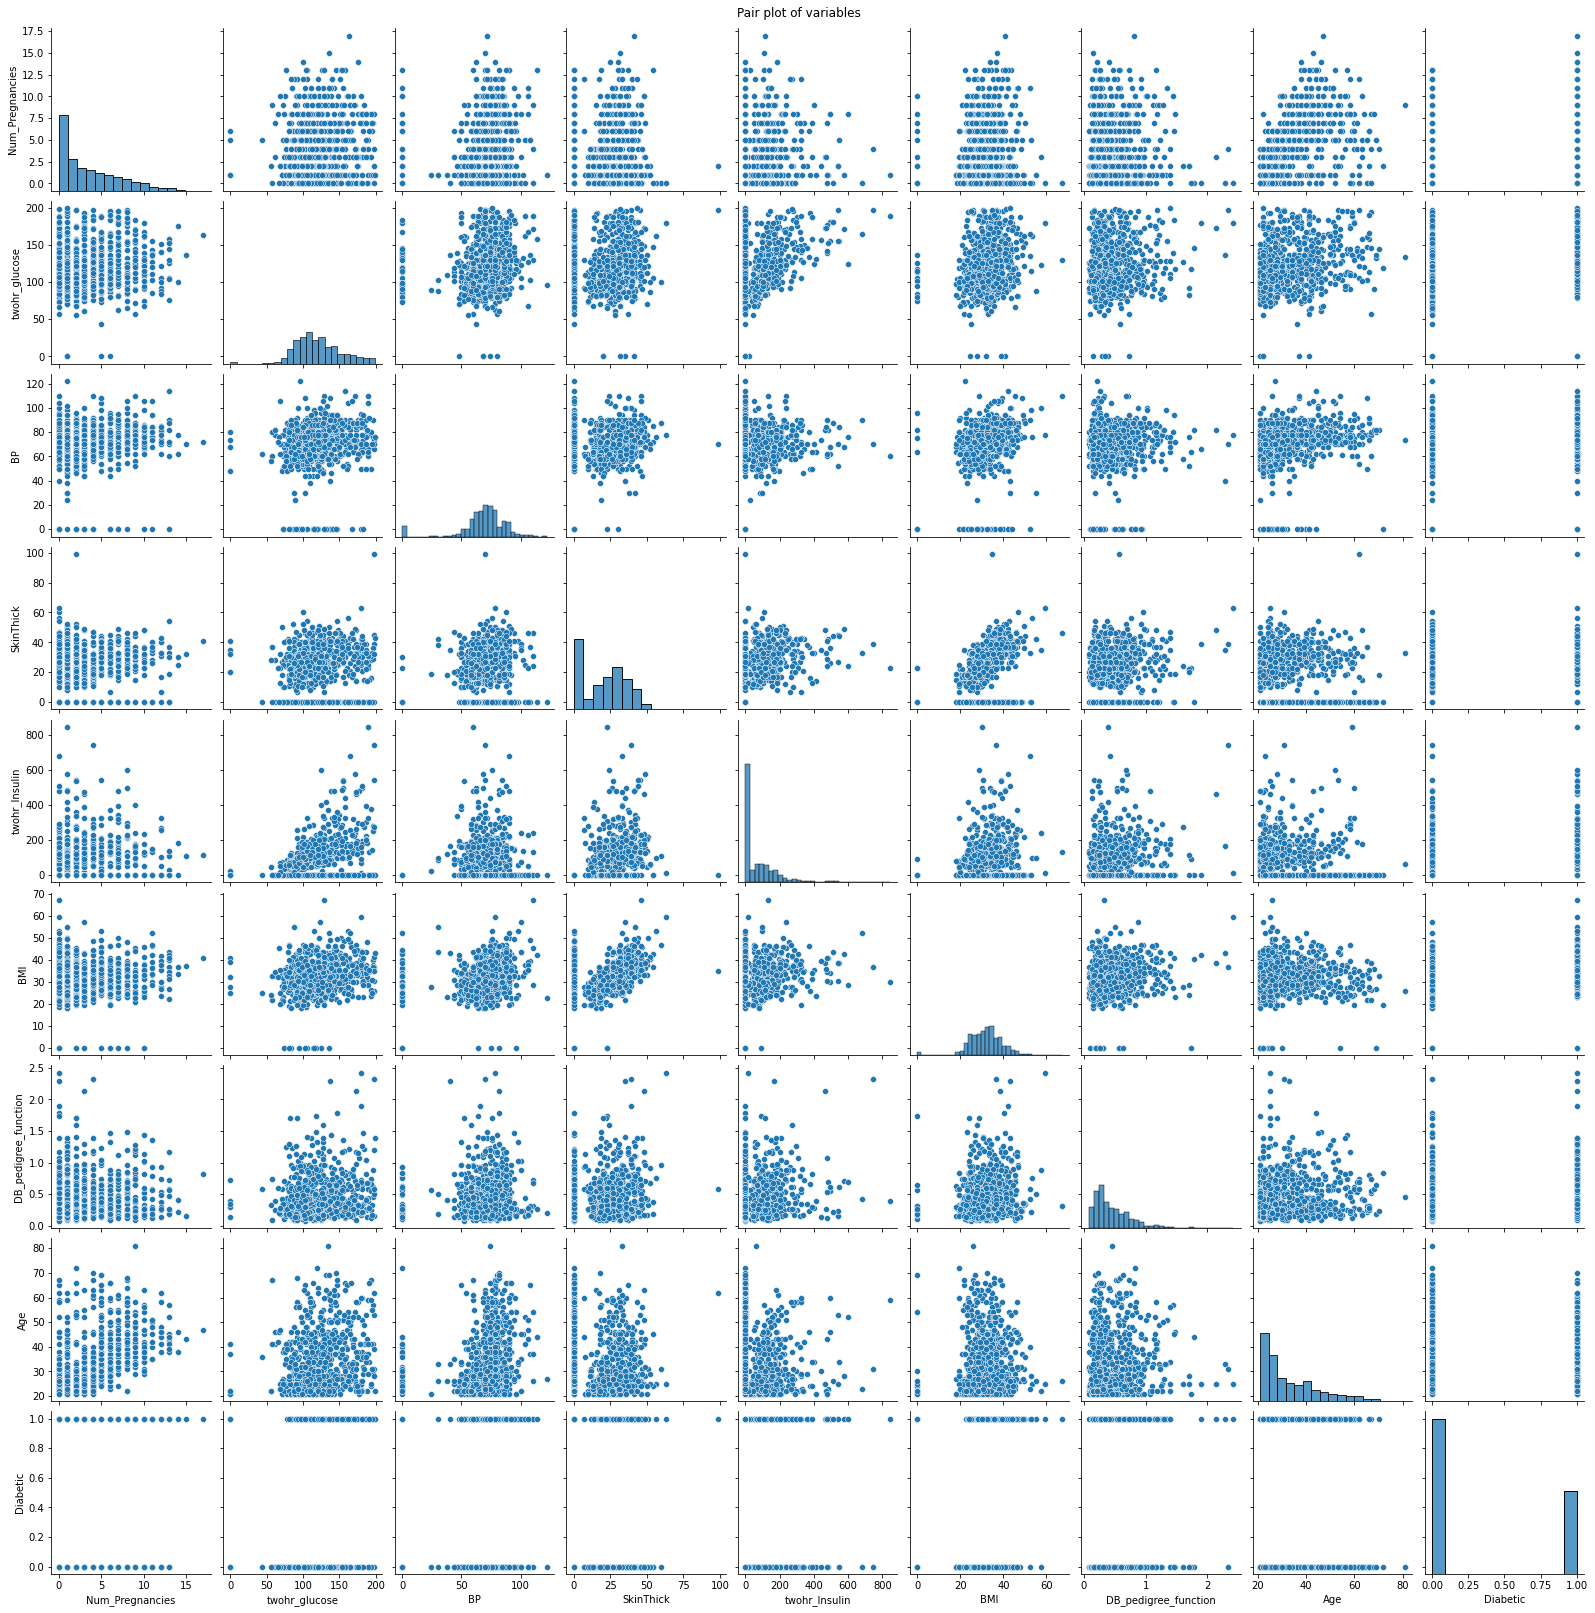

In [21]:
fig2=plt.figure()
g=sns.pairplot(df)
g.fig.suptitle("Pair plot of variables", y=1)
plt.show()

## Visualise the Dataset

Visualising the data is an important step of the data analysis. With a graphical visualisation of the data we have a better understanding of the various features values distribution.

Histogram

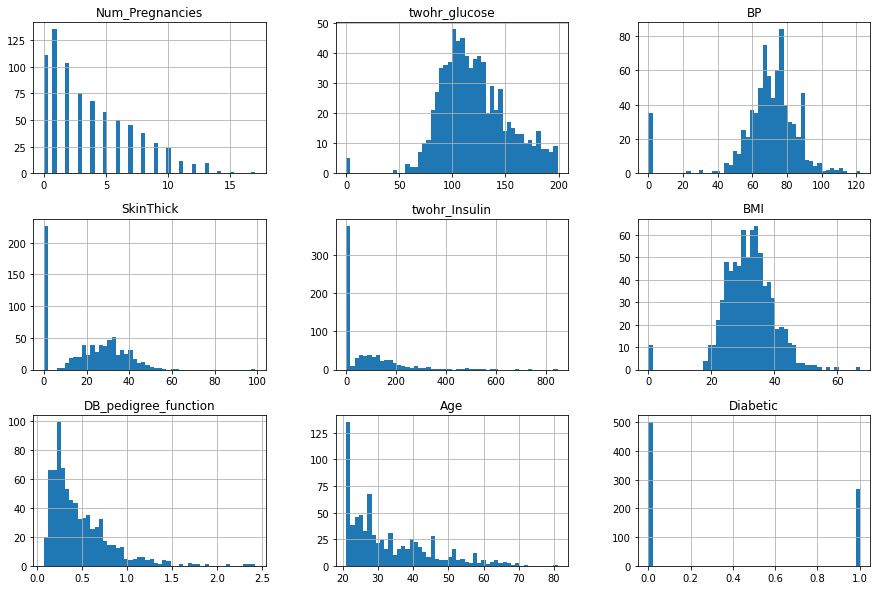

In [22]:
df.hist(bins=50, figsize=(15, 10))
plt.show()

Bar Plots:

Here we use bar plots wherein each bar represents the magnitude of each possible categorical value of our data.  This is appropriate to use for categorical data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

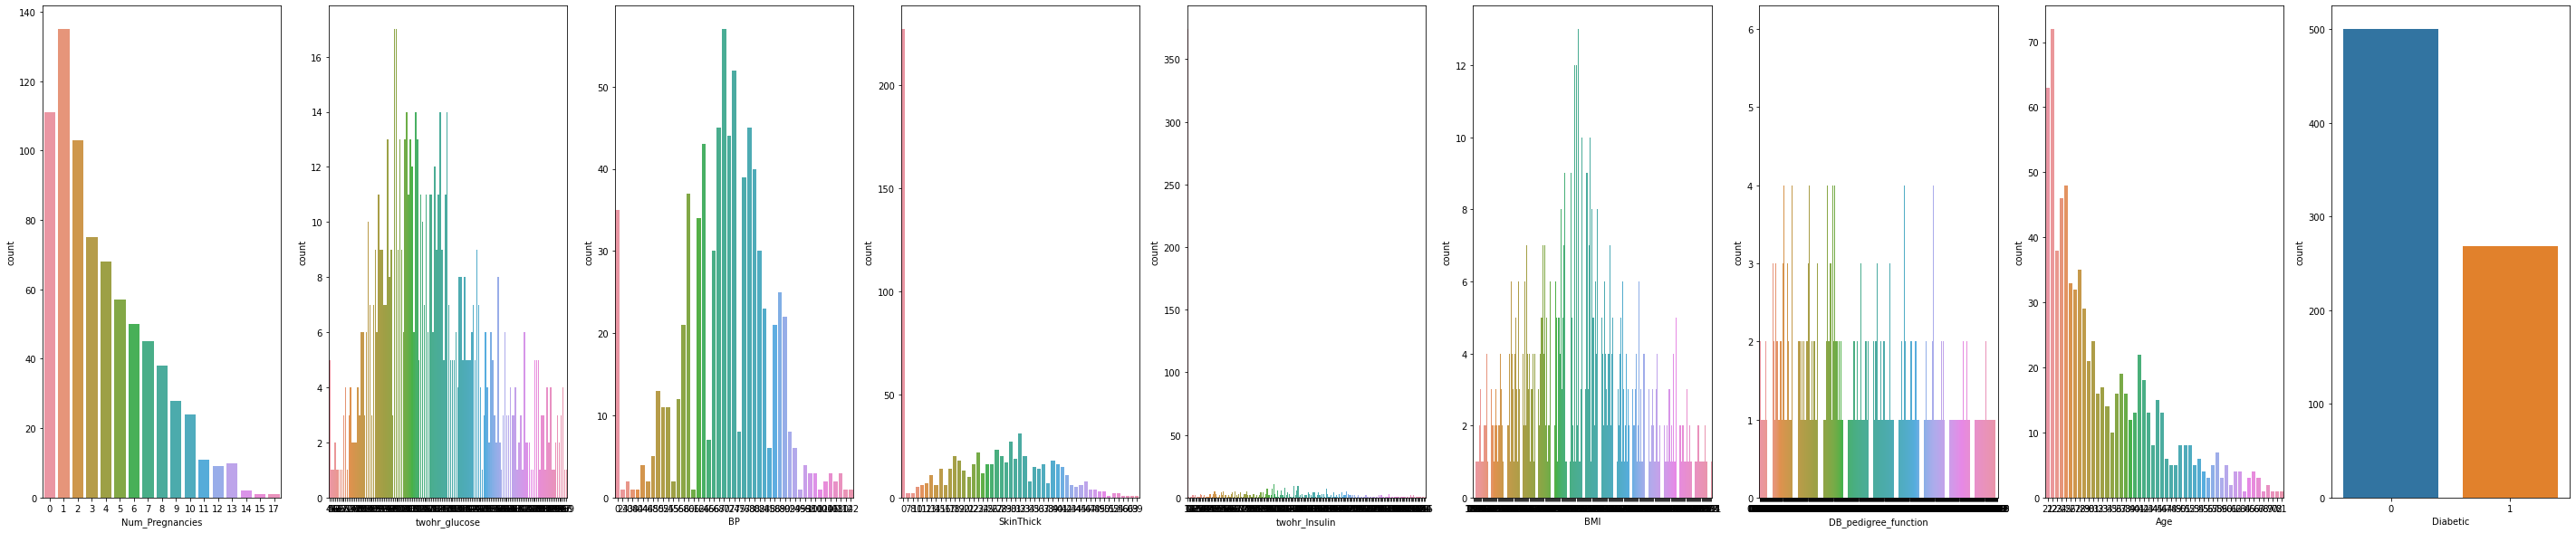

In [24]:
categorical_columns = ["Num_Pregnancies", "twohr_glucose", "BP", "SkinThick", "twohr_Insulin", "BMI","DB_pedigree_function", "Age", "Diabetic"]
fig, ax = plt.subplots(1, 9, figsize=(50, 10))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)

Finding:
> Previously, it is not make possible to get 0 values in twohr_glucose, BP, SkinThick, twohr_Insulin, and BMI. We will see it later during the data transformation phase.

## Data cleaning and transformation

Previous  analysis there has missing data for some of the features. Machine learning algorithms do not work well when the data is missing so we have to find a solution to "clean" the data we have.

But, we could not eliminate all zero values becuase there has so many important data.

So we could calculate the median value for a specific column and substitute, and then apply in zero values. 

In [25]:
# Calculate the median value for twohr_glucose
median_twohr_glucose = df['twohr_glucose'].median()
# Substitute it in the twohr_glucose column of the
# dataset where values are 0
df['twohr_glucose'] = df['twohr_glucose'].replace(to_replace=0, value=median_twohr_glucose)

In [26]:
# Calculate the median value for BP
median_BP = df['BP'].median()
# Substitute it in the BP column of the
# dataset where values are 0
df['BP'] = df['BP'].replace(to_replace=0, value=median_BP)

In [27]:
# Calculate the median value for SkinThickness
median_SkinThick = df['SkinThick'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
df['SkinThick'] = df['SkinThick'].replace(to_replace=0, value=median_SkinThick)

In [28]:
# Calculate the median value for twohr_Insulin
median_twohr_Insulin = df['twohr_Insulin'].median()
# Substitute it in the twohr_Insulin column of the
# dataset where values are 0
df['twohr_Insulin'] = df['twohr_Insulin'].replace(to_replace=0, value=median_twohr_Insulin)

In [29]:
# Calculate the median value for BMI
median_BMI = df['BMI'].median()
# Substitute it in the BMI column of the
# dataset where values are 0
df['BMI'] = df['BMI'].replace(to_replace=0, value=median_BMI)

In [30]:
#Check there has 0 values
df_info['ZeroValues']=(df==0).sum()
df_info

,Dtype,Nunique,MissingValues,Count,ZeroValues,?Values
Num_Pregnancies,int64,17,0,768,111,0
twohr_glucose,int64,136,0,768,0,0
BP,int64,47,0,768,0,0
SkinThick,int64,51,0,768,0,0
twohr_Insulin,int64,186,0,768,0,0
BMI,float64,248,0,768,0,0
DB_pedigree_function,float64,517,0,768,0,0
Age,int64,52,0,768,0,0
Diabetic,int64,2,0,768,500,0


Num_Pregnancies and Diabetic can make sense to be zero, so I do not transformed all the cloumns.

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Num_Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
twohr_glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BP,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThick,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
twohr_Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DB_pedigree_function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Diabetic,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Finding:
> min values are changed.

In [32]:
# view correlation matrix for the variables in the dataset
corrMatrix2 = df.corr()
corrMatrix2

,Num_Pregnancies,twohr_glucose,BP,SkinThick,twohr_Insulin,BMI,DB_pedigree_function,Age,Diabetic
Num_Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
twohr_glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BP,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThick,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
twohr_Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DB_pedigree_function,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Diabetic,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


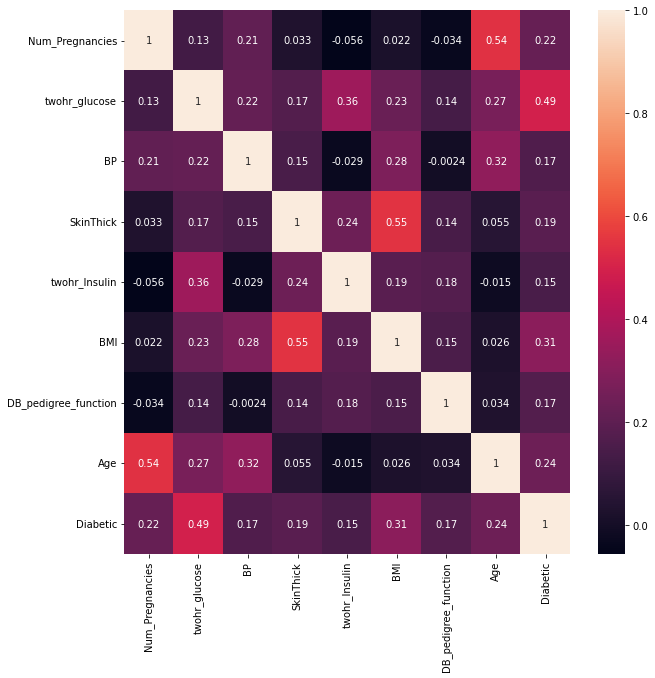

In [33]:
# show visual representation of the correlation matrix
plt.rcParams.update({'font.size': 10,'figure.figsize':(10,10)})
f4 = sns.heatmap(corrMatrix2, annot=True)
plt.show()  # show plot

Findings:
> New correlation values.
1. There are no strong correlation between the features.
* SkinThick x BMI (0.55)
* Num_Pregnancies x Age (0.54)
* twohr_glucose x Diabetic (0.49)
2. Negative correlation:
* DB_pedigree_function x BP (-0.024)

Finding with Diabetic:
> 1. Diabetic x twohr_glucose (0.49)
2. Diabetic x BMI (0.31)
3. Diabetic x Age (0.24)
4. Diabetic x Num_Pregnancies (0.22)

##Scaling

In [34]:
df2=df.copy()
df2

,Num_Pregnancies,twohr_glucose,BP,SkinThick,twohr_Insulin,BMI,DB_pedigree_function,Age,Diabetic
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [35]:
# separating dependent and independent features
X = df2.drop("Diabetic",axis=1)
y = df2['Diabetic']

In [36]:
# scaling the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

Split data

In [37]:
# splitting training and test data (80:20) ratio
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.20,random_state = 42)

In [38]:
from sklearn.svm import SVC
sv_classifier = SVC()
sv_classifier.fit(X_train,y_train)
y_pred = sv_classifier.predict(X_test)

In [39]:
# accuracy of SVC
accuracy = accuracy_score(y_test,y_pred)
print("SVC Accuracy:",accuracy)

SVC Accuracy: 0.7532467532467533


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


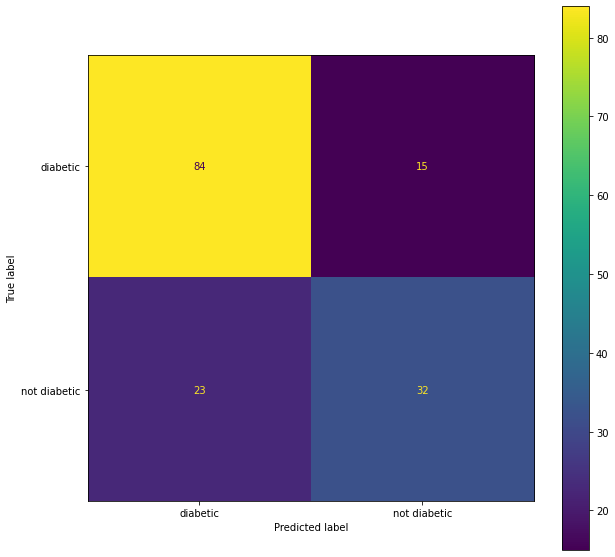

In [40]:
# plotting the confusion matrix 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(sv_classifier,X_test,y_test,values_format = 'd',display_labels = ['diabetic','not diabetic'])

In [41]:
# selecting different parameters to use for improving the SVC Accuracy
paramameter = [
    {'C' : [0.5,1,10,100],
     'gamma' : ['scale','auto',1,0.1,0.01,0.001,0.0001],
    'kernel' : ['linear','poly','rbf']}
]

In [ ]:
# Hyperparameter optimisation
from sklearn.model_selection import GridSearchCV

optimal_paramameter = GridSearchCV(SVC(),paramameter,cv = 5,scoring = 'accuracy',verbose = 0)
optimal_paramameter.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                    0.0001],
                          'kernel': ['linear', 'poly', 'rbf']}],
             scoring='accuracy')

In [42]:
sv_classifier2 = SVC(C = 100, gamma = 0.0001,probability = True)
sv_classifier2.fit(X_train,y_train)
y_pred = sv_classifier2.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test,y_pred)
print("SVC Accuracy score:",accuracy)

SVC Accuracy score: 0.7727272727272727


Finding:
> Accuracy is improved

In [44]:
y_pred = sv_classifier2.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
results = pd.DataFrame([['Logistic Regression (Lasso)', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.772727,0.708333,0.618182,0.660194


In [45]:
#printing the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



Interpretation: Of the entire test set, 77% of the data can be explained with the current model.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


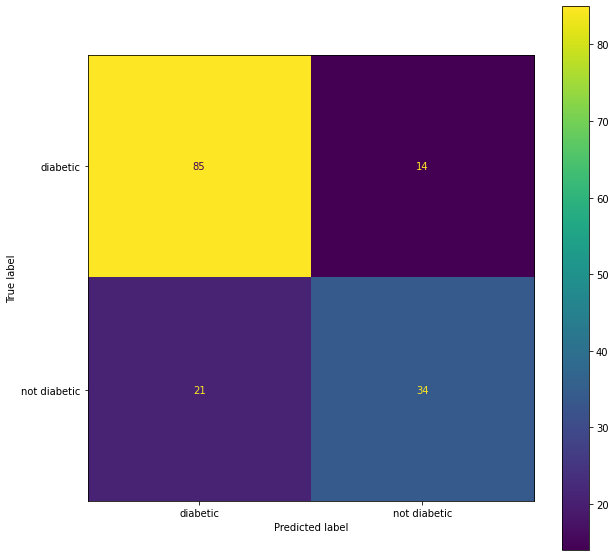

In [46]:
# plotting confusion matrix again
plot_confusion_matrix(sv_classifier2,X_test,y_test,values_format = 'd',display_labels = ['diabetic','not diabetic'])

In [47]:
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix

array([[85, 14],
       [21, 34]])

##Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = df.drop('Diabetic',1)
Y = df['Diabetic']

#set up the regression
def regressionFunc(X,Y):
  X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_Logi = LogisticRegression()
linear_Logi.fit(X_train,y_train)
lr_y_pred = linear_Logi.predict(X_test)

accuracy_lr = accuracy_score(y_test,lr_y_pred)
print("Logistic Regression Accuracy:",accuracy_lr)

Logistic Regression Accuracy: 0.7662337662337663


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


###SMOTE algorithm(Synthetic Minority Oversampling Technique)##


In [49]:
data_final = df2
X = data_final.loc[:, data_final.columns != 'Diabetic']
y = data_final.loc[:, data_final.columns == 'Diabetic']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, np.ravel(y_train))
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  590
Number of no subscription in oversampled data 295
Number of subscription 295
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Retest logistic regression model

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [51]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[139  18]
 [ 36  38]]


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       157
           1       0.68      0.51      0.58        74

    accuracy                           0.77       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.76      0.77      0.76       231



Interpretation: Of the entire test set, 70% of the data can be explained with the current model.

ROC curve

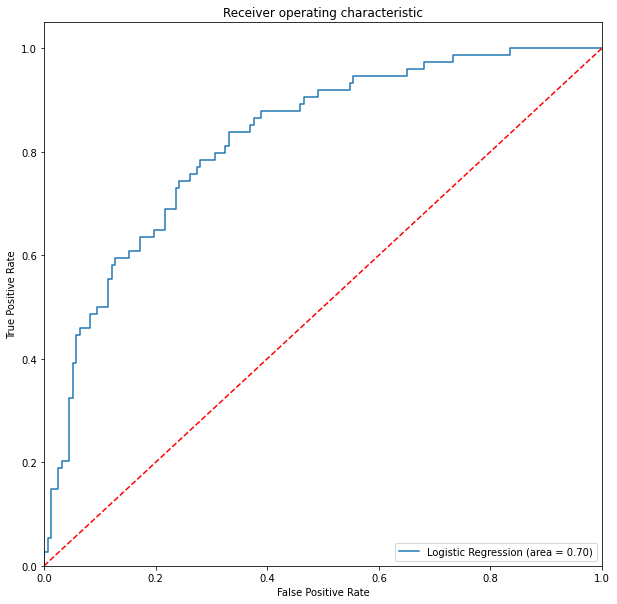

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

This model seems alright, but a predictive power of 70% is not altogether that convincing.

## Basic Feature Engineering



**Chi-Square**

In [56]:
#import stats module to perform chi-square
from scipy import stats

#perform chi-square test
target=df2['Diabetic'].reset_index(drop=True).copy()
chi_sq=[]
for i in range(0,9):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(target, df.iloc[:,i]))[0:2],i])
#chi_sq
chi_sq.sort(reverse=True)
chi_sq

[[(763.6046352310092, 4.4187473707431515e-168), 8],
 [(533.0240955223882, 0.29290546216135716), 6],
 [(285.39163837953095, 0.04282766735336028), 5],
 [(269.0129682784292, 4.295488087774985e-11), 1],
 [(227.7698297937357, 0.017596214168718233), 4],
 [(140.9375197044156, 2.3069818149863462e-10), 7],
 [(69.82216692164947, 0.026926305523723344), 3],
 [(64.59480868723006, 8.648349123362548e-08), 0],
 [(54.18373332688946, 0.16396346195045997), 2]]

In [59]:
y, X = dmatrices('Diabetic ~ Num_Pregnancies + twohr_glucose + BP +  C(SkinThick)+ C(BMI) + C(twohr_Insulin) + C(DB_pedigree_function) + C(Age)', df2, return_type="dataframe")
y = np.ravel(y)

#ignore warnings
np.warnings.filterwarnings('ignore')

# instantiate a logistic regression model, and fit with X and y
LRmodel = LogisticRegression()
LRmodel = LRmodel.fit(X, y)

# check the accuracy on the training set
LRmodel.score(X, y)

0.9127604166666666

We see that the above looks very good. Since we have a score of 91%, that means our model is quite accurate.

In [60]:
# what percentage had Diabetic?
y.mean()

0.3489583333333333

In [61]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(LRmodel.coef_)))

,0,1
0,Intercept,[-2.0250521283920224]
1,C(SkinThick)[T.8],[-0.21784259280487409]
2,C(SkinThick)[T.10],[-0.38530951336879776]
3,C(SkinThick)[T.11],[-0.3986403929909701]
4,C(SkinThick)[T.12],[-0.23521077979607485]
...,...,...
1046,C(Age)[T.72],[-0.1513580174056154]
1047,C(Age)[T.81],[-0.19414284147014488]
1048,Num_Pregnancies,[0.0998014239659273]
1049,twohr_glucose,[0.04289209603419584]


P-values

In [66]:
X=os_data_X
y=os_data_y

In [67]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.585441
         Iterations 6
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.155     
Dependent Variable:  y                 AIC:               706.8204  
Date:                2022-06-25 00:06  BIC:               741.8614  
No. Observations:    590               Log-Likelihood:    -345.41   
Df Model:            7                 LL-Null:           -408.96   
Df Residuals:        582               LLR p-value:       2.5430e-24
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Num_Pregnancies       0.0491   0.0335  1.4651 0.1429 -0.0166  0.1148
twohr_glucose         0.0245

We know drop any p-values greater than .05 (Num_Pregnancies, SkinThick, twohr_Insulin, DB_pedigree_function, and Age  ).

In [69]:
#model from logit
cols=['Num_Pregnancies','SkinThick','twohr_Insulin','DB_pedigree_function','Age']
X=os_data_X[cols]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.671495
         Iterations 5
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.031     
Dependent Variable:  y                 AIC:               802.3638  
Date:                2022-06-25 00:07  BIC:               824.2644  
No. Observations:    590               Log-Likelihood:    -396.18   
Df Model:            4                 LL-Null:           -408.96   
Df Residuals:        585               LLR p-value:       3.8994e-05
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      5.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Num_Pregnancies       0.0507   0.0307  1.6504 0.0989 -0.0095  0.1109
SkinThick            -0.0237

Still higher p values in Num_Pregnancies and Age.

##KNN Model

In [71]:
# Applying Knn and finding the best value of 'k'
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []
accuracy_max = 0
k_maximum = 0
for i in range(1,30):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    
    train_accuracy = knn.score(X_train,y_train)
    train_scores.append(train_accuracy)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_scores.append(test_accuracy)
    if test_accuracy > accuracy_max:
        accuracy_max = test_accuracy
        k_maximum = i
print("maximum_test_accuracy:",accuracy_max, "is achieved at k:",k_maximum)

maximum_test_accuracy: 0.7575757575757576 is achieved at k: 10


In [72]:
knn1 = KNeighborsClassifier(7)
knn1.fit(X_train,y_train)
knn_y_pred = knn1.predict(X_test)

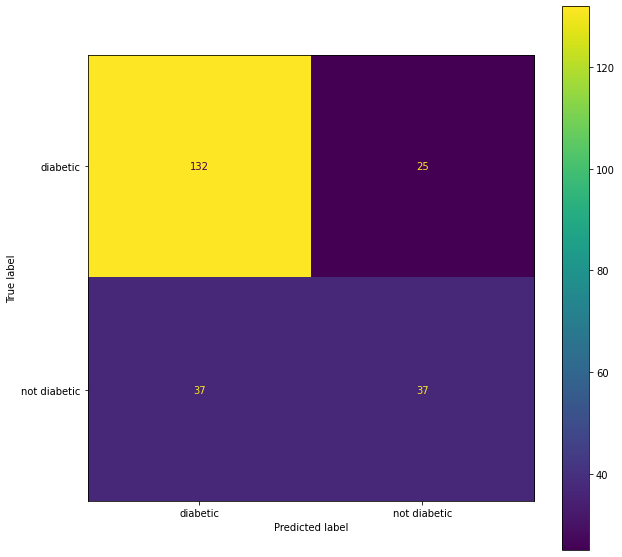

In [73]:
plot_confusion_matrix(knn1,X_test,y_test,values_format = 'd',display_labels = ['diabetic','not diabetic'])

In [74]:
# Hyperparameter optimisation
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn2 = KNeighborsClassifier()
knn_cv= GridSearchCV(knn2,param_grid,cv =5,verbose = 0)
knn_cv.fit(X_train,y_train)

print("Best Parameters: " + str(knn_cv.best_params_))

Best Parameters: {'n_neighbors': 8}


In [75]:
knn2 = KNeighborsClassifier(n_neighbors = 17)
knn2.fit(X_train,y_train)
knn_y_pred = knn2.predict(X_test)
acc = accuracy_score(y_test,knn_y_pred)
acc

0.7229437229437229

In [76]:
from sklearn.metrics import recall_score,precision_score,f1_score
recall = recall_score(y_test,knn_y_pred)
precision = precision_score(y_test,knn_y_pred)
f1 = f1_score(y_test,knn_y_pred)
print("KNN Recall:",recall)
print("KNN Precision:",precision)
print("KNN F1:",f1)

KNN Recall: 0.47297297297297297
KNN Precision: 0.5833333333333334
KNN F1: 0.5223880597014926


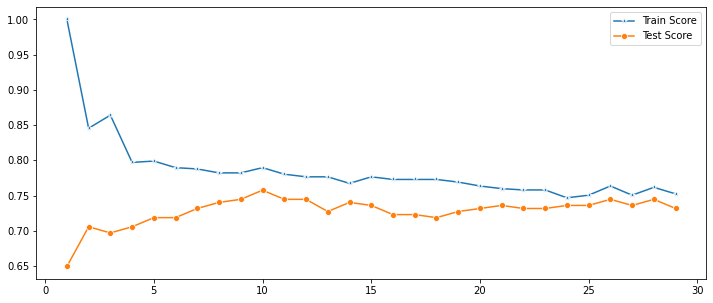

In [77]:
# plotting training and test scores of KNN model
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,30),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,30),test_scores,marker='o',label='Test Score')

We can see that maximum value of k = 10 where the test score is maximum.

##Conclusion

This data about Pima Indian diabetes. The data set has 768 records, 8 attributes, 2 classes, 268(34.9%) positive results for a diabetes test, and 500(65.1%) negative results. All patients were females at least 21 years old of Pima Indian Heritage. 

Attrbutes are Num_Pregnancies, twohr_glucose, BP, SkinThick, twohr_Insulin, BMI, DB_pedigree_function, Age, Diabetic. 

There has zero values from twohr_glucose, BP, SkinThick, twohr_Insulin, and BMI. That is not make sense, so I changed that zero values to median values. 

There has high values from correlation.
* Diabetic x twohr_glucose (0.49)
* Diabetic x BMI (0.31)
* Diabetic x Age (0.24)
* Diabetic x Num_Pregnancies (0.22)

We find out Accuracy, precision, recall, and F1-socre. The entire test set, 77% of the data can be explained with the current model.

We do SMOTE algorithm and retest logistic regression. And show ROC curve. Moreover, there has Chi-square and p-values. We know drop any p-values greater than .05 (Num_Pregnancies, SkinThick, twohr_Insulin, DB_pedigree_function, and Age ). However, it is still higher p values in Num_Pregnancies and Age.

Finally, we do KNN model and make plotting training and test score of KNN model. We can see that maximum value of k = 10 where the test score is maximum.